# **2024년 따릉이 월별 이용량 분석**

- dataset: https://data.seoul.go.kr/dataList/OA-14994/F/1/datasetView.do

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [21]:
# import pandas as pd

# file1 = "./data/서울특별시_공공자전거_대여소별_이용정보(월별)_24.1-6.csv"
# file2 = "./data/서울특별시_공공자전거_대여소별_이용정보(월별)_24.7-12.csv"
# output_file = "./data/서울특별시_공공자전거_대여소별_이용정보(월별)_2024_통합.csv"

# # CSV 불러오기
# df1 = pd.read_csv(file1, encoding="cp949")
# df2 = pd.read_csv(file2, encoding="cp949")

# # 파일 합치기
# df_merged = pd.concat([df1, df2], ignore_index=True)

# # 합친 데이터 저장
# df_merged.to_csv(output_file, index=False, encoding="utf-8-sig")

# print("저장 완료:", output_file)

저장 완료: ./data/서울특별시_공공자전거_대여소별_이용정보(월별)_2024_통합.csv


In [35]:
file = "./data/서울특별시_공공자전거_대여소별_이용정보(월별)_2024_통합.csv"
df = pd.read_csv(file, encoding="utf-8-sig")

In [40]:
df.head()

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202401,332,356
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202401,517,500
2,강남구,2303. 논현역 10번출구,202401,554,512
3,강남구,2304. 대현그린타워,202401,131,72
4,강남구,2305. MCM 본사 직영점 앞,202401,169,174


In [42]:
df.tail()

,자치구,대여소명,기준년월,대여건수,반납건수
32781,중랑구,4846. 상봉동양엔파트 앞,202411,689,698
32782,중랑구,4846. 상봉동양엔파트 앞,202412,428,419
32783,중랑구,4847. 신내역시티프라디움 앞,202410,341,350
32784,중랑구,4847. 신내역시티프라디움 앞,202411,555,542
32785,중랑구,4847. 신내역시티프라디움 앞,202412,348,316


In [44]:
df.shape

(32786, 5)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32786 entries, 0 to 32785
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     32786 non-null  object
 1   대여소명    32786 non-null  object
 2   기준년월    32786 non-null  int64 
 3   대여건수    32786 non-null  int64 
 4   반납건수    32786 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ MB


In [58]:
monthly_sum = df.groupby("기준년월")[["대여건수", "반납건수"]].sum().reset_index()
monthly_sum["총이용건수"] = monthly_sum["대여건수"] + monthly_sum["반납건수"]

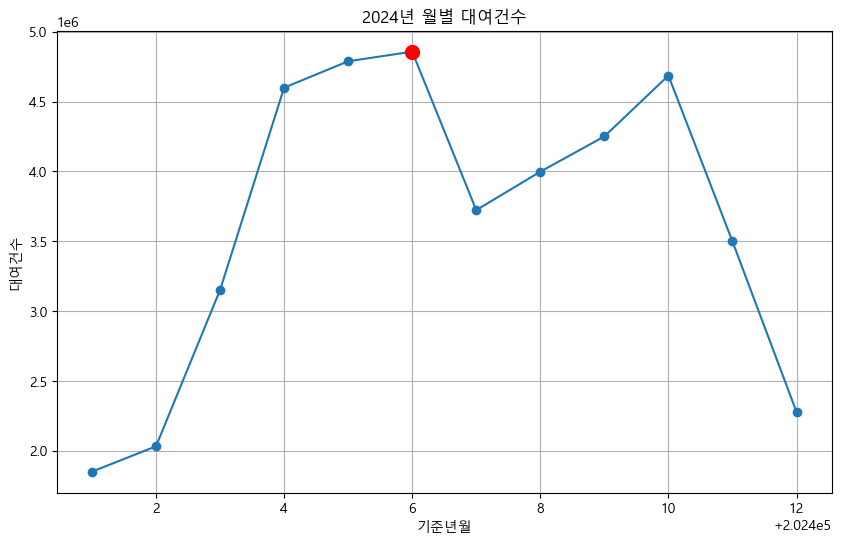

In [98]:
# 1. 대여건수 그래프
max_idx = monthly_sum["대여건수"].idxmax()
max_month = monthly_sum.loc[max_idx, "기준년월"]
max_value = monthly_sum.loc[max_idx, "대여건수"]

plt.figure(figsize=(10,6))

plt.plot(monthly_sum["기준년월"], monthly_sum["대여건수"], marker="o", label="대여건수")
plt.title("2024년 월별 대여건수")
plt.xlabel("기준년월")
plt.ylabel("대여건수")
plt.grid(True)
plt.scatter(max_month, max_value, color="red", s=100, zorder=5, label="최대값")

plt.savefig("./output/rent_usage_2024.png", dpi=300)
plt.show()

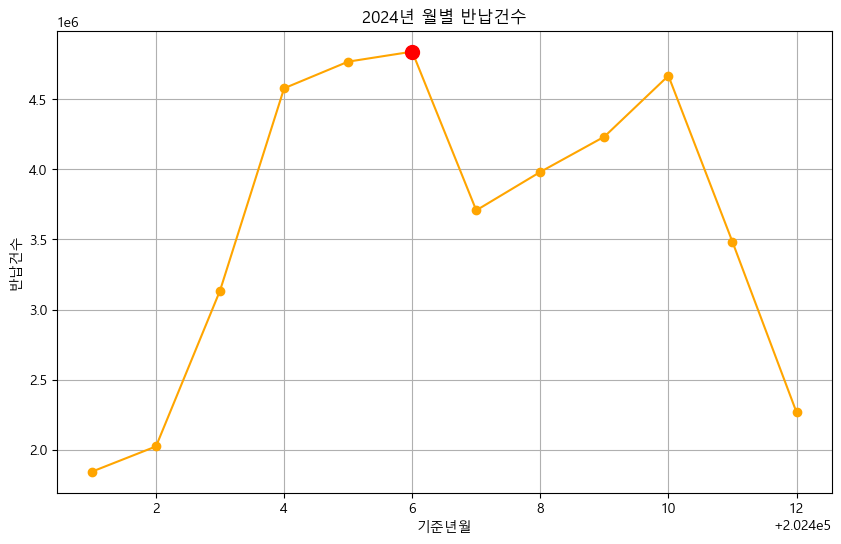

In [94]:
# 2. 반납건수 그래프
max_idx = monthly_sum["반납건수"].idxmax()
max_month = monthly_sum.loc[max_idx, "기준년월"]
max_value = monthly_sum.loc[max_idx, "반납건수"]

plt.figure(figsize=(10,6))

plt.plot(monthly_sum["기준년월"], monthly_sum["반납건수"], marker="o", color="orange", label="반납건수")
plt.title("2024년 월별 반납건수")
plt.xlabel("기준년월")
plt.ylabel("반납건수")
plt.grid(True)
plt.scatter(max_month, max_value, color="red", s=100, zorder=5, label="최대값")

plt.savefig("./output/return_usage_2024.png", dpi=300)
plt.show()

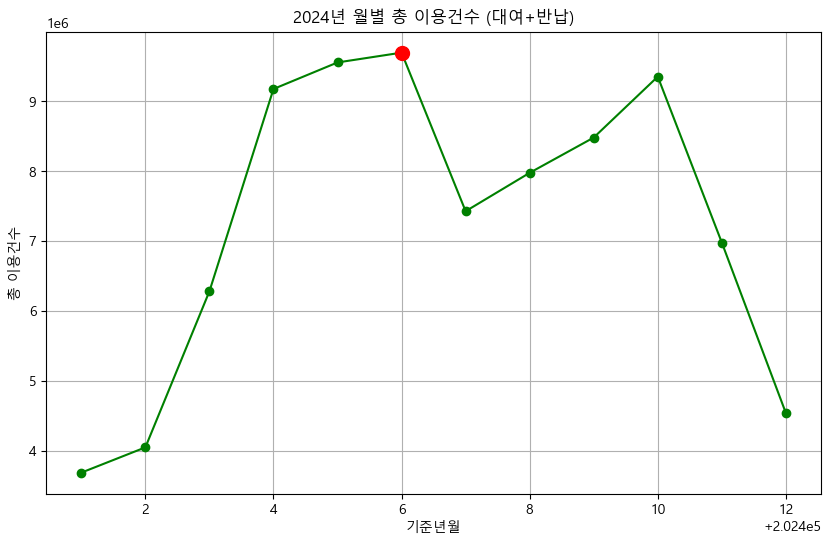

In [96]:
# 3. 총 이용건수 그래프 (대여+반납)
max_idx = monthly_sum["총이용건수"].idxmax()
max_month = monthly_sum.loc[max_idx, "기준년월"]
max_value = monthly_sum.loc[max_idx, "총이용건수"]

plt.figure(figsize=(10,6))

plt.plot(monthly_sum["기준년월"], monthly_sum["총이용건수"], marker="o", color="green", label="총 이용건수")
plt.title("2024년 월별 총 이용건수 (대여+반납)")
plt.xlabel("기준년월")
plt.ylabel("총 이용건수")
plt.grid(True)
plt.scatter(max_month, max_value, color="red", s=100, zorder=5, label="최대값")

plt.savefig("./output/total_usage_2024.png", dpi=300)
plt.show()